
# Inspecting number of PTMs with annotation information available

As described in Running PTM-POSE section, PTM-POSE provides various options for annotating functional information for PTMs, coming from various databases. However, PTM functional information is inherently sparse, and so most annotations will only provide information on a handful of PTMs. For this reason, it can be useful to probe how many PTMsTo better understand the types of annotations that are available, as well as the number of PTMs that have an annotation of that type. This can be done using the `analyze` function in PTM-POSE.

<div class="alert alert-info"><h4>Note</h4><p>This examples assumes that you have already run the PTM-POSE pipeline and have at annotated PTMs with at least one layer of information using the annotate module</p></div>


/home/srcrowl/miniconda3/envs/pose_doc/lib/python3.12/site-packages/ptm_pose/pose_config.py:20: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  ptm_coordinates = pd.read_csv(resource_dir + 'ptm_coordinates.csv', dtype = {'Chromosome/scaffold name': str, 'PTM Position in Isoform': int})


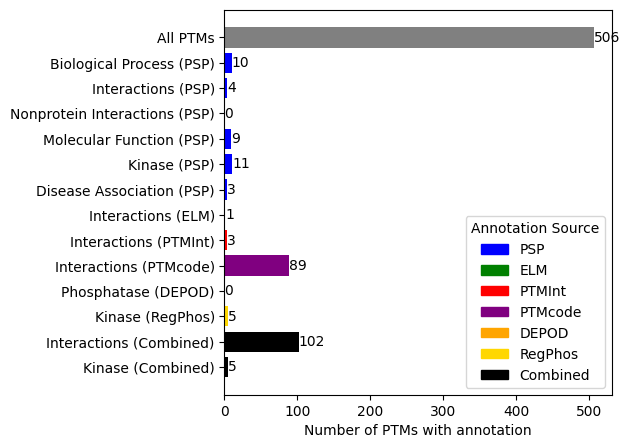

In [1]:
from ptm_pose import analyze, helpers
from ptm_pose import plots as pose_plots
import pandas as pd

# Load spliced ptm data
spliced_ptms = helpers.load_example_data(altered_flanks = False)

pose_plots.show_available_annotations(spliced_ptms)

As you can, see there are only a few PTMs from each annotation that have 
available information, with the most being 9 PTMs out of the 184 differentially 
included sites having been associated with a biological process. While this this 
should be taken into consideration when analyzing these annotations, we can glean 
some useful information and identify potentially interesting proteins/sites to dig 
deeper into. Let's look at the PTMs that have been associated with a biological
process: 



In [2]:
ptms_with_annotation, annotation_counts = analyze.get_ptm_annotations(spliced_ptms, database = "PhosphoSitePlus", annotation_type = 'Process')
print('Specific PTMs with annotation:')
ptms_with_annotation

Specific PTMs with annotation:


,Gene,UniProtKB Accession,Residue,PTM Position in Isoform,Modification Class,PSP:ON_PROCESS,dPSI,Significance,Impact
0,BCAR1,P56945,Y,267.0,Phosphorylation,"cell growth, induced",-0.07,0.0458775672499,Excluded
1,BCAR1,P56945,Y,287.0,Phosphorylation,"cell growth, induced",-0.07,0.0458775672499,Excluded
2,BIN1,O00499,T,348.0,Phosphorylation,signaling pathway regulation,-0.112,0.0233903490744,Excluded
3,CEACAM1,P13688,S,461.0,Phosphorylation,"apoptosis, altered",0.525,1.73943268451e-09,Included
4,CTTN,Q14247,K,272.0,Acetylation,"cell motility, inhibited",0.09,0.0355211287599,Included
5,CTTN,Q14247,S,298.0,Phosphorylation,"cell motility, altered; cytoskeletal reorganiz...",0.09,0.0355211287599,Included
6,SPHK2,Q9NRA0,S,387.0,Phosphorylation,"cell motility, altered",0.253,0.0129400018182,Included
7,SPHK2,Q9NRA0,T,614.0,Phosphorylation,"cell motility, altered",0.253,0.0129400018182,Included
8,TSC2,P49815,S,981.0,Phosphorylation,"carcinogenesis, inhibited; cell growth, inhibi...",-0.219,4.18472157275e-05,Excluded
9,YAP1,P46937,K,342.0,Ubiquitination,"carcinogenesis, altered",-0.188;-0.161,0.000211254197372;4.17884655686e-07,Excluded


We can also look at the number of PTMs associated with each annotation:



In [3]:
print('Number of PTMs associated with each annotation:')
annotation_counts

Number of PTMs associated with each annotation:


,All Impacted,Included,Excluded,Altered Flank
PSP:ON_PROCESS,,,,
"cell motility, altered",3,3.0,0.0,0.0
signaling pathway regulation,2,0.0,2.0,0.0
"cell growth, induced",2,0.0,2.0,0.0
"apoptosis, altered",1,1.0,0.0,0.0
"cell motility, inhibited",1,1.0,0.0,0.0
cytoskeletal reorganization,1,1.0,0.0,0.0
"cell adhesion, inhibited",1,1.0,0.0,0.0
"carcinogenesis, inhibited",1,0.0,1.0,0.0
"cell growth, inhibited",1,0.0,1.0,0.0


note: the above function can be used with any of the available databases, and could also be used for altered flanking sequences

